In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [104]:
df = pd.read_csv("laptop_data_cleaned.csv")
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


C:\Users\bmkus\AppData\Local\Temp\ipykernel_1848\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

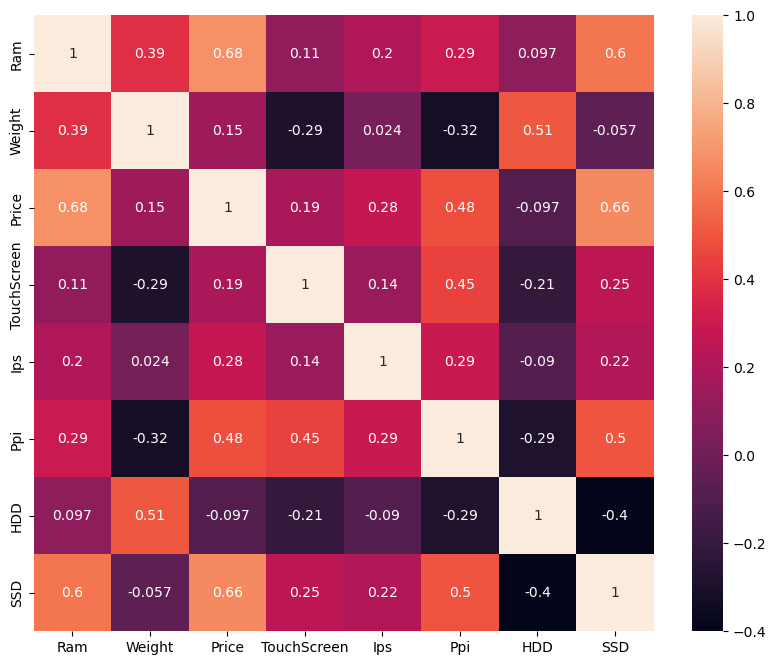

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [106]:
df.shape

(1273, 13)

In [107]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [109]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [110]:
y = [x for x in df['Cpu_brand'] if isfloat(x) == False]
print(y)

['Intel Core i5', 'Intel Core i5', 'Intel Core i5', 'Intel Core i7', 'Intel Core i5', 'AMD Processor', 'Intel Core i7', 'Intel Core i5', 'Intel Core i7', 'Intel Core i5', 'Intel Core i5', 'Intel Core i3', 'Intel Core i7', 'Intel Core i3', 'Other Intel Processor', 'Intel Core i5', 'Intel Core i7', 'Intel Core i7', 'Intel Core i3', 'Intel Core i5', 'Other Intel Processor', 'Intel Core i5', 'AMD Processor', 'Intel Core i5', 'Intel Core i7', 'Intel Core i3', 'Intel Core i5', 'Intel Core i5', 'Intel Core i7', 'Intel Core i5', 'Other Intel Processor', 'AMD Processor', 'AMD Processor', 'Intel Core i7', 'Intel Core i5', 'Other Intel Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i5', 'Intel Core i5', 'Intel Core i3', 'Intel Core i7', 'Intel Core i5', 'Intel Core i5', 'Intel Core i5', 'Intel Core i5', 'Intel Core i3', 'AMD Processor', 'Intel Core i5', 'Other Intel Processor', 'Other Intel Processor', 'Intel Core i7', 'AMD Processor', 'Intel Core i7', 'Intel Core i3', 'Intel Core i7',

In [111]:
df['Cpu_brand']=df['Cpu_brand'].replace(['Other Intel Processor','AMD Processor','Intel Core i5','Intel Core i7','Intel Core i3'],['0','1','5','7','3'])
df[['Cpu_brand']]=df[['Cpu_brand']].apply(pd.to_numeric)

In [112]:
y = [x for x in df['Gpu_brand'] if isfloat(x) == False]
print(y)

['Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'AMD', 'Intel', 'Intel', 'Nvidia', 'Intel', 'Intel', 'Intel', 'AMD', 'AMD', 'Intel', 'Intel', 'AMD', 'AMD', 'Nvidia', 'Intel', 'Intel', 'Nvidia', 'AMD', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Nvidia', 'Intel', 'AMD', 'AMD', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Nvidia', 'Intel', 'Nvidia', 'Nvidia', 'Intel', 'Nvidia', 'Intel', 'Intel', 'AMD', 'AMD', 'Nvidia', 'Intel', 'Nvidia', 'AMD', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'Nvidia', 'Intel', 'AMD', 'Intel', 'Intel', 'Intel', 'Intel', 'Nvidia', 'AMD', 'Intel', 'Intel', 'Nvidia', 'Intel', 'AMD', 'AMD', 'Nvidia', 'Intel', 'Nvidia', 'Intel', 'Intel', 'Nvidia', 'Nvidia', 'Intel', 'Intel', 'Intel', 'AMD', 'AMD', 'Nvidia', 'Nvidia', 'Intel', 'Nvidia', 'Intel', 'AMD', 'Nvidia', 'Intel', 'Nvidia', 'Intel', 'Intel', 'AMD', 'AMD', 'Nvidia', 'Nvidia', 'AMD', 'AMD', 'AMD', 'Nvidia', 'Intel', 'Nvidia', 'Intel', 'Nvidia', 'Nvidia', 'Intel', 'Nvidia', 'Intel', 'Intel', 'Intel'

In [113]:
df['Gpu_brand']=df['Gpu_brand'].replace(['Intel','AMD','Nvidia'],['0','1','2'])
df[['Gpu_brand']]=df[['Gpu_brand']].apply(pd.to_numeric)

In [114]:
y = [x for x in df['Os'] if isfloat(x) == False]
print(y)

['Mac', 'Mac', 'Others', 'Mac', 'Mac', 'Windows', 'Mac', 'Mac', 'Windows', 'Windows', 'Others', 'Others', 'Mac', 'Windows', 'Mac', 'Mac', 'Windows', 'Mac', 'Others', 'Windows', 'Windows', 'Windows', 'Others', 'Windows', 'Windows', 'Windows', 'Mac', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Mac', 'Windows', 'Others', 'Windows', 'Windows', 'Windows', 'Others', 'Windows', 'Others', 'Windows', 'Windows', 'Mac', 'Others', 'Windows', 'Windows', 'Windows', 'Others', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Others', 'Windows', 'Windows', 'Others', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Others', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Others', 'Windows', 'Windows', 'Windows', 'Windows', 'Mac', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Others', 'Ot

In [115]:
df['Os']=df['Os'].replace(['Mac','Windows','Others'],['0','1','2'])
df[['Os']]=df[['Os']].apply(pd.to_numeric)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   int64  
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   int64  
 12  Os           1273 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 129.4+ KB


In [117]:
features = ['Ram','Weight','Ips','Ppi','Cpu_brand','HDD','SSD','Gpu_brand','Os']
x = df[features]
y = df['Price']
x.shape, y.shape

((1273, 9), (1273,))

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,test_size=0.1)
y_test.shape

(128,)

In [119]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1145, 9)
(1145,)
(128, 9)
(128,)


In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [121]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

r2=r2_score(y_test, pred)

rmse = sqrt(mean_squared_error(y_test, pred)) 
print(rmse,r2)

0.356425466129734 0.6652842378385296


In [122]:
print(x)

      Ram  Weight  Ips         Ppi  Cpu_brand   HDD  SSD  Gpu_brand  Os
0       8    1.37    1  226.983005          5     0  128          0   0
1       8    1.34    0  127.677940          5     0    0          0   0
2       8    1.86    0  141.211998          5     0  256          0   2
3      16    1.83    1  220.534624          7     0  512          1   0
4       8    1.37    1  226.983005          5     0  256          0   0
...   ...     ...  ...         ...        ...   ...  ...        ...  ..
1268    4    2.20    0  100.454670          7   500    0          2   1
1269    4    1.80    1  157.350512          7     0  128          0   1
1270   16    1.30    1  276.053530          7     0  512          0   1
1271    2    1.50    0  111.935204          0     0    0          0   1
1272    6    2.19    0  100.454670          7  1000    0          1   1

[1273 rows x 9 columns]


In [123]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ram        1273 non-null   int64  
 1   Weight     1273 non-null   float64
 2   Ips        1273 non-null   int64  
 3   Ppi        1273 non-null   float64
 4   Cpu_brand  1273 non-null   int64  
 5   HDD        1273 non-null   int64  
 6   SSD        1273 non-null   int64  
 7   Gpu_brand  1273 non-null   int64  
 8   Os         1273 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 89.6 KB


In [124]:
y.iloc[0]

11.175754549129524

In [125]:
input_data = np.array([[8,1,1,226.983005,5,0,128,0,0]])

prediction = lr.predict(input_data)
print('Estimasi Harga Laptop :',prediction)
print('Harga Laptop Asli adalh :',y.iloc[0])

Estimasi Harga Laptop : [11.31782906]
Harga Laptop Asli adalh : 11.175754549129524


c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [127]:
import pickle

filename = "estimasi_harga_laptop1.sav"
pickle.dump(lr,open(filename,'wb'))